# ニューラルネットワーク -画像認識トレーニング
- ディープラーニングについては、多層の人口ニューラルネットワークを最も効率よくトレーニングするために開発された、一連のアルゴリズムとして考えることができる。

1.多層ニューラルネットワークの概念を理解する

2.画像を分類するためのニューラルネットワークをトレーニングする

3.ニューラルネットワークをトレーニングするための強力なバックプロパゲーションアルゴリズムを実装する

4.ニューラルネットワークの実装をデバッグする。

# 12.1 人口ニューラルネットワークによる複雑な関数のモデリング
- 人口ニューロンは、多層人口ニューラルネットワークの構成要素である。
- 人口ニューラルネットワークの基本概念は、仮説とモデルの上に成り立っている。
- その仮説とモデルとは、人間の脳が複雑な問題を解決する方法に関するものだ。
- ディープラーニングアルゴリズムを利用すれば、ディープニューラルネットワークを事前にトレーニングするための特徴検出器を未分類データから作成できる。
- ディープニューラルネットワークとは、多くの層で構成されたニューラルネットワークである。
- ADALINEは単層ニューラルネットワークである。


# 12.1.2 多層ニューラルネットワーウアーキテクチャ
- 複数の単一ニューロンを多層フィードフォワードニューラルネットワークに結合させる方法について見ていく。
- この特殊なネットワークは多層パーセプトロンとも呼ばれる。
- 入力層、隠れ層、出力層の３つの層からなる多層パーセプトロンがある。
- 隠れ層が1つ以上存在するネットワークはディープ人工ニューラルネットワークと呼ばれる。
- ニューラルネットワーク内の層とユニットの個数を追加のハイパーパラメータとして考えることができる。
- ディプニューラルネットワーク構造を事前にトレーニングする特別なアルゴリズムが開発されており、それがディープラーニングである。

# 12.1.3 フォワードプロバゲーションによるニューラルネットワークの活性化
- 多層ニューラルネットワークの3つの単純なステップ

1.入力層を出発点として、トレーニングデータのパターンをネットワーク経由で順方向に伝搬させ、出力を生成する。

2.ネットワークの出力に基づき、後ほど説明するコスト関数を使って誤差を計算する。この誤差を最小化することが目的となる。

3.誤差を逆方向に伝搬させることで、ネットワーク内の各重みに対する偏導関数を求め、モデルを更新する。

- 勾配ベースの手法を用いてニューロンを欠王する重みを学習するには、活性化関数が微分可能でなければならない。
- 画像分類と言った複雑な問題を解くには、ロジスティック回帰で使用したシグモイド関数など、非線形の活性化関数が必要である。
- 多層パーセプトロンはフィードフォワード人工ニューラルネットワークの代表的な例である。
- フィードフォワードは、各層がループせずに次の層への入力になることを意味する。

# 12.2 手書きの数字を分類する

# 12.2.1 MNISTデータセットを取得する

In [24]:
import os
import struct
import numpy as np

def load_mnist(path,kind='train'):
    '''MNISTデータをpathからロード'''
    #　引数に指定したパスを結合（ラベルや画像のパスを作成）
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
    
    #ファイルを読み込む：
    #引数にファイル、モードを指定（rbは読み込みのバイナリモード）
    with open(labels_path, 'rb') as lbpath:
        # バイナリを文字列に変換:unpack関数の引数にフォーマット、8バイト分の
        # バイナリデータを指定して、マジックナンバー、アイテムの個数を読み込む
        magic, n = struct.unpack('>II',lbpath.read(8))
        # ファイルからラベルを読み込む配列を構築:fromfile関数の引数に
        # ファイル、配列のデータ形式を指定
        labels = np.fromfile(lbpath, dtype=np.uint8)
        
    with open(images_path,'rb') as imgpath:
        magic, num, row, cols = struct.unpack('>IIII', imgpath.read(16))
        # 画像ピクセル乗法の配列サイズを変更
        # （行数：ラベルのサイズ、列数：特徴量の個数）
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels),784)
        
    return images,labels

In [16]:
X_train,y_train = load_mnist('mnist',kind='train')
print('Rows: %d, columns: %d') %(X_train.shape[0],X_train.shape[1])

Rows: 60000, columns: 784


In [17]:
X_test,y_test = load_mnist('mnist',kind='t10k')
print('Rows: %d,columns: %d') % (X_test.shape[0],X_test.shape[1])

Rows: 10000,columns: 784


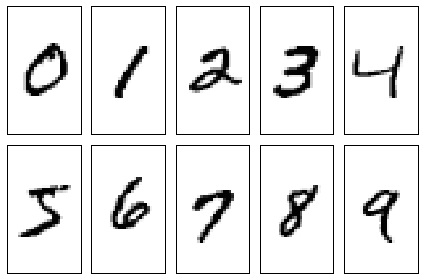

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
# subplotsで描画の設定：引数で描画領域の行数/列数、x/y軸の統一を指定
fig,ax = plt.subplots(nrows=2,ncols=5,sharex=True,sharey=True)
ax = ax.flatten() #配列を1次元に変形
for i in range(10):
    img = X_train[y_train == i][0].reshape(28,28) #配列を28×28に変形
    ax[i].imshow(img,cmap='Greys',interpolation='nearest') #色や補完方法を指定
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

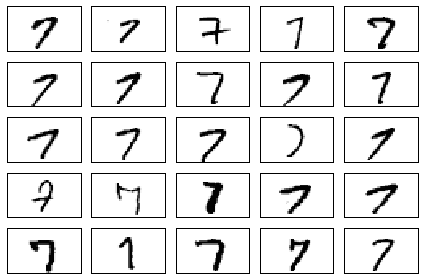

In [21]:
fig, ax = plt.subplots(nrows=5,ncols=5,sharex=True,sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28,28)
    ax[i].imshow(img,cmap='Greys',interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

- MNISTの画像データとラベルをCSVファイルとして保存しておくと、特殊なバイトフォーマットをサポートしないプログラムで開けるようになるが、CSVファイルフォーマットの場合、ファイルサイズがかなり大きくなる。（10倍程度）

In [22]:
import numpy as np
from scipy.special import expit
import sys


class NeuralNetMLP(object):
    """ Feedforward neural network / Multi-layer perceptron classifier.

    Parameters
    ------------
    n_output : int
        Number of output units, should be equal to the
        number of unique class labels.
    n_features : int
        Number of features (dimensions) in the target dataset.
        Should be equal to the number of columns in the X array.
    n_hidden : int (default: 30)
        Number of hidden units.
    l1 : float (default: 0.0)
        Lambda value for L1-regularization.
        No regularization if l1=0.0 (default)
    l2 : float (default: 0.0)
        Lambda value for L2-regularization.
        No regularization if l2=0.0 (default)
    epochs : int (default: 500)
        Number of passes over the training set.
    eta : float (default: 0.001)
        Learning rate.
    alpha : float (default: 0.0)
        Momentum constant. Factor multiplied with the
        gradient of the previous epoch t-1 to improve
        learning speed
        w(t) := w(t) - (grad(t) + alpha*grad(t-1))
    decrease_const : float (default: 0.0)
        Decrease constant. Shrinks the learning rate
        after each epoch via eta / (1 + epoch*decrease_const)
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent circles.
    minibatches : int (default: 1)
        Divides training data into k minibatches for efficiency.
        Normal gradient descent learning if k=1 (default).
    random_state : int (default: None)
        Set random state for shuffling and initializing the weights.

    Attributes
    -----------
    cost_ : list
      Sum of squared errors after each epoch.

    """
    def __init__(self, n_output, n_features, n_hidden=30,
                 l1=0.0, l2=0.0, epochs=500, eta=0.001,
                 alpha=0.0, decrease_const=0.0, shuffle=True,
                 minibatches=1, random_state=None):

        np.random.seed(random_state)
        self.n_output = n_output
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.w1, self.w2 = self._initialize_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches

    def _encode_labels(self, y, k):
        """Encode labels into one-hot representation

        Parameters
        ------------
        y : array, shape = [n_samples]
            Target values.

        Returns
        -----------
        onehot : array, shape = (n_labels, n_samples)

        """
        onehot = np.zeros((k, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[val, idx] = 1.0
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        w1 = np.random.uniform(-1.0, 1.0,
                               size=self.n_hidden*(self.n_features + 1))
        w1 = w1.reshape(self.n_hidden, self.n_features + 1)
        w2 = np.random.uniform(-1.0, 1.0,
                               size=self.n_output*(self.n_hidden + 1))
        w2 = w2.reshape(self.n_output, self.n_hidden + 1)
        return w1, w2

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)

        Uses scipy.special.expit to avoid overflow
        error for very small input values z.

        """
        # return 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    def _sigmoid_gradient(self, z):
        """Compute gradient of the logistic function"""
        sg = self._sigmoid(z)
        return sg * (1.0 - sg)

    def _add_bias_unit(self, X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            X_new = np.ones((X.shape[0], X.shape[1] + 1))
            X_new[:, 1:] = X
        elif how == 'row':
            X_new = np.ones((X.shape[0] + 1, X.shape[1]))
            X_new[1:, :] = X
        else:
            raise AttributeError('`how` must be `column` or `row`')
        return X_new

    def _feedforward(self, X, w1, w2):
        """Compute feedforward step

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
            Input layer with original features.
        w1 : array, shape = [n_hidden_units, n_features]
            Weight matrix for input layer -> hidden layer.
        w2 : array, shape = [n_output_units, n_hidden_units]
            Weight matrix for hidden layer -> output layer.

        Returns
        ----------
        a1 : array, shape = [n_samples, n_features+1]
            Input values with bias unit.
        z2 : array, shape = [n_hidden, n_samples]
            Net input of hidden layer.
        a2 : array, shape = [n_hidden+1, n_samples]
            Activation of hidden layer.
        z3 : array, shape = [n_output_units, n_samples]
            Net input of output layer.
        a3 : array, shape = [n_output_units, n_samples]
            Activation of output layer.

        """
        a1 = self._add_bias_unit(X, how='column')
        z2 = w1.dot(a1.T)
        a2 = self._sigmoid(z2)
        a2 = self._add_bias_unit(a2, how='row')
        z3 = w2.dot(a2)
        a3 = self._sigmoid(z3)
        return a1, z2, a2, z3, a3

    def _L2_reg(self, lambda_, w1, w2):
        """Compute L2-regularization cost"""
        return (lambda_/2.0) * (np.sum(w1[:, 1:] ** 2) +
                                np.sum(w2[:, 1:] ** 2))

    def _L1_reg(self, lambda_, w1, w2):
        """Compute L1-regularization cost"""
        return (lambda_/2.0) * (np.abs(w1[:, 1:]).sum() +
                                np.abs(w2[:, 1:]).sum())

    def _get_cost(self, y_enc, output, w1, w2):
        """Compute cost function.

        Parameters
        ----------
        y_enc : array, shape = (n_labels, n_samples)
            one-hot encoded class labels.
        output : array, shape = [n_output_units, n_samples]
            Activation of the output layer (feedforward)
        w1 : array, shape = [n_hidden_units, n_features]
            Weight matrix for input layer -> hidden layer.
        w2 : array, shape = [n_output_units, n_hidden_units]
            Weight matrix for hidden layer -> output layer.

        Returns
        ---------
        cost : float
            Regularized cost.

        """
        term1 = -y_enc * (np.log(output))
        term2 = (1.0 - y_enc) * np.log(1.0 - output)
        cost = np.sum(term1 - term2)
        L1_term = self._L1_reg(self.l1, w1, w2)
        L2_term = self._L2_reg(self.l2, w1, w2)
        cost = cost + L1_term + L2_term
        return cost

    def _get_gradient(self, a1, a2, a3, z2, y_enc, w1, w2):
        """ Compute gradient step using backpropagation.

        Parameters
        ------------
        a1 : array, shape = [n_samples, n_features+1]
            Input values with bias unit.
        a2 : array, shape = [n_hidden+1, n_samples]
            Activation of hidden layer.
        a3 : array, shape = [n_output_units, n_samples]
            Activation of output layer.
        z2 : array, shape = [n_hidden, n_samples]
            Net input of hidden layer.
        y_enc : array, shape = (n_labels, n_samples)
            one-hot encoded class labels.
        w1 : array, shape = [n_hidden_units, n_features]
            Weight matrix for input layer -> hidden layer.
        w2 : array, shape = [n_output_units, n_hidden_units]
            Weight matrix for hidden layer -> output layer.

        Returns
        ---------
        grad1 : array, shape = [n_hidden_units, n_features]
            Gradient of the weight matrix w1.
        grad2 : array, shape = [n_output_units, n_hidden_units]
            Gradient of the weight matrix w2.

        """
        # backpropagation
        sigma3 = a3 - y_enc
        z2 = self._add_bias_unit(z2, how='row')
        sigma2 = w2.T.dot(sigma3) * self._sigmoid_gradient(z2)
        sigma2 = sigma2[1:, :]
        grad1 = sigma2.dot(a1)
        grad2 = sigma3.dot(a2.T)

        # regularize
        grad1[:, 1:] += (w1[:, 1:] * (self.l1 + self.l2))
        grad2[:, 1:] += (w2[:, 1:] * (self.l1 + self.l2))

        return grad1, grad2

    def predict(self, X):
        """Predict class labels

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
            Input layer with original features.

        Returns:
        ----------
        y_pred : array, shape = [n_samples]
            Predicted class labels.

        """
        if len(X.shape) != 2:
            raise AttributeError('X must be a [n_samples, n_features] array.\n'
                                 'Use X[:,None] for 1-feature classification,'
                                 '\nor X[[i]] for 1-sample classification')

        a1, z2, a2, z3, a3 = self._feedforward(X, self.w1, self.w2)
        y_pred = np.argmax(z3, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data.

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
            Input layer with original features.
        y : array, shape = [n_samples]
            Target class labels.
        print_progress : bool (default: False)
            Prints progress as the number of epochs
            to stderr.

        Returns:
        ----------
        self

        """
        self.cost_ = []
        X_data, y_data = X.copy(), y.copy()
        y_enc = self._encode_labels(y, self.n_output)

        delta_w1_prev = np.zeros(self.w1.shape)
        delta_w2_prev = np.zeros(self.w2.shape)

        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx = np.random.permutation(y_data.shape[0])
                X_data, y_enc = X_data[idx], y_enc[:, idx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            for idx in mini:

                # feedforward
                a1, z2, a2, z3, a3 = self._feedforward(X_data[idx],
                                                       self.w1,
                                                       self.w2)
                cost = self._get_cost(y_enc=y_enc[:, idx],
                                      output=a3,
                                      w1=self.w1,
                                      w2=self.w2)
                self.cost_.append(cost)

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(a1=a1, a2=a2,
                                                  a3=a3, z2=z2,
                                                  y_enc=y_enc[:, idx],
                                                  w1=self.w1,
                                                  w2=self.w2)

                delta_w1, delta_w2 = self.eta * grad1, self.eta * grad2
                self.w1 -= (delta_w1 + (self.alpha * delta_w1_prev))
                self.w2 -= (delta_w2 + (self.alpha * delta_w2_prev))
                delta_w1_prev, delta_w2_prev = delta_w1, delta_w2

        return self

In [23]:
nn = NeuralNetMLP(n_output=10,
                 n_features=X_train.shape[1],
                 n_hidden=50,
                 l2=0.1,
                 l1=0.0,
                 epochs=1000,
                 eta=0.001,
                 alpha=0.001,
                 decrease_const=0.00001,
                 shuffle=True,
                 minibatches=50,
                 random_state=1)

nn.fit(X_train,y_train,print_progress=True)

Epoch: 1000/1000

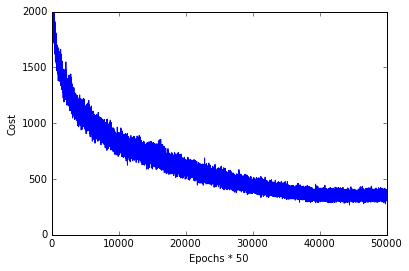

In [26]:
plt.plot(range(len(nn.cost_)),nn.cost_)
plt.ylim([0,2000])
plt.ylabel('Cost')
plt.xlabel('Epochs * 50')
plt.show()

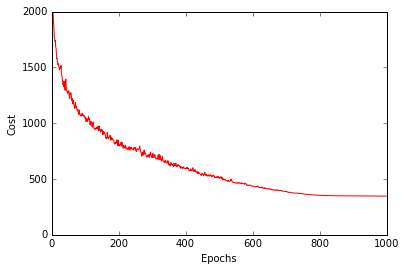

In [27]:
batches = np.array_split(range(len(nn.cost_)),1000)
cost_ary = np.array(nn.cost_)
cost_avgs = [np.mean(cost_ary[i]) for i in batches]
plt.plot(range(len(cost_avgs)),cost_avgs,color='red')
plt.ylim([0,2000])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

In [35]:
y_train_pred = nn.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / float(X_train.shape[0])
print('Training accuracy: %.2f%%') % (acc*100)

Training accuracy: 97.82%


In [36]:
y_test_pred = nn.predict(X_test)
acc = np.sum(y_test == y_test_pred,axis=0) / float(X_test.shape[0])
print('Test accuracy: %.2f%%') % (acc * 100)

Test accuracy: 96.08%


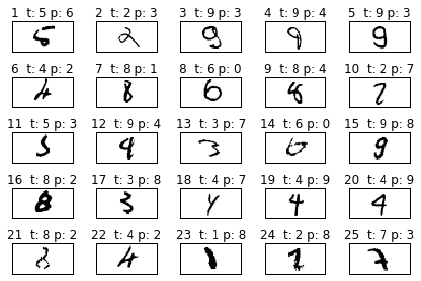

In [55]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]
fig, ax = plt.subplots(nrows=5,ncols=5,sharex=True,sharey=True)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys',interpolation='nearest')
    ax[i].set_title("%d  t: %d p: %d" %(i+1,correct_lab[i],miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()